In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from noventis.data_cleaner import NoventisScaler
from noventis.data_cleaner import NoventisEncoder
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def plot_scaling_comparison(df_original, df_scaled, scenario_title):
    """Membuat plot perbandingan distribusi sebelum dan sesudah scaling."""
    cols = df_original.select_dtypes(include=np.number).columns
    n_cols = len(cols)
    
    fig, axes = plt.subplots(n_cols, 2, figsize=(10, n_cols * 3.5))
    fig.suptitle(f'Perbandingan Distribusi - Skenario: {scenario_title}', fontsize=16, y=1.02)
    
    for i, col in enumerate(cols):
        # Plot Sebelum Scaling
        sns.kdeplot(df_original[col], ax=axes[i, 0], fill=True, color='blue')
        axes[i, 0].set_title(f'{col} (Sebelum)')
        axes[i, 0].set_xlabel('')
        
        # Plot Sesudah Scaling
        sns.kdeplot(df_scaled[col], ax=axes[i, 1], fill=True, color='green')
        axes[i, 1].set_title(f'{col} (Sesudah)')
        axes[i, 1].set_xlabel('')
        
    plt.tight_layout()
    plt.show()

In [4]:
# --- USE CASE 1: Automatic Scaling ---
import pandas as pd
import numpy as np
from noventis.data_cleaner import NoventisScaler

# Sample data with different distributions
# you may change this to your own dataframe
df = pd.DataFrame({
    'normal_data': np.random.normal(loc=100, scale=15, size=500),
    'skewed_data': np.random.gamma(shape=1, scale=50, size=500)**2,
    'data_with_outliers': np.concatenate([np.random.normal(loc=0, scale=5, size=496), np.array([-50, 50, -60, 60])]),
    'bimodal_data': np.concatenate([np.random.normal(loc=20, scale=5, size=250), 
                                    np.random.normal(loc=80, scale=7, size=250)])
})

# initialize NoventisScaler object
scaler = NoventisScaler(method='auto')
df_scaled = scaler.fit_transform(df)

print('Data Before Scaling')
print(df.tail(5))

print('\nData After Scaling')
print(df_scaled.tail(5))

Data Before Scaling
     normal_data  skewed_data  data_with_outliers  bimodal_data
495   115.381376   306.653431             9.03088     79.859439
496   120.757663  4173.479216           -50.00000     76.144801
497    90.378627  9590.590810            50.00000     66.237544
498   122.497686     3.340195           -60.00000     80.789446
499   104.472138  1104.220702            60.00000     75.073413

Data After Scaling
     normal_data  skewed_data  data_with_outliers  bimodal_data
495     0.957189    -0.643537            1.258913      0.968803
496     1.312413     0.512271           -7.510264      0.849803
497    -0.694805     0.982211            7.344973      0.532420
498     1.427381    -1.852616           -8.995788      0.998596
499     0.236388    -0.130653            8.830497      0.815481


STARTING NOVENTIS DATA CLEANER PIPELINE

Executing Step: IMPUTE...
Step IMPUTE Complete.

Executing Step: OUTLIER...
Step OUTLIER Complete.

Executing Step: ENCODE...
Step ENCODE Complete.

Executing Step: SCALE...
Step SCALE Complete.

PIPELINE FINISHED

====================== DATA QUALITY REPORT ======================
  Final Quality Score: 52.47/100
     - Completeness Score                 : 100.00     (Weight: 40%)
     - Data Consistency Score             : 8.23       (Weight: 0%)
     - Distribution Quality Score         : 0.00       (Weight: 20%)
     - Feature Engineering Score          : 100.00     (Weight: 10%)

PIPELINE PROCESS SUMMARY
  - Imputation: Successfully filled 15749 missing values.
  - Outliers: Removed 0 rows and winsorized 5545 rows identified as outliers.
  - Encoding: Transformed 43 categorical columns into 128 new features.
  - Scaling: Standardized the scale for 166 numerical columns.



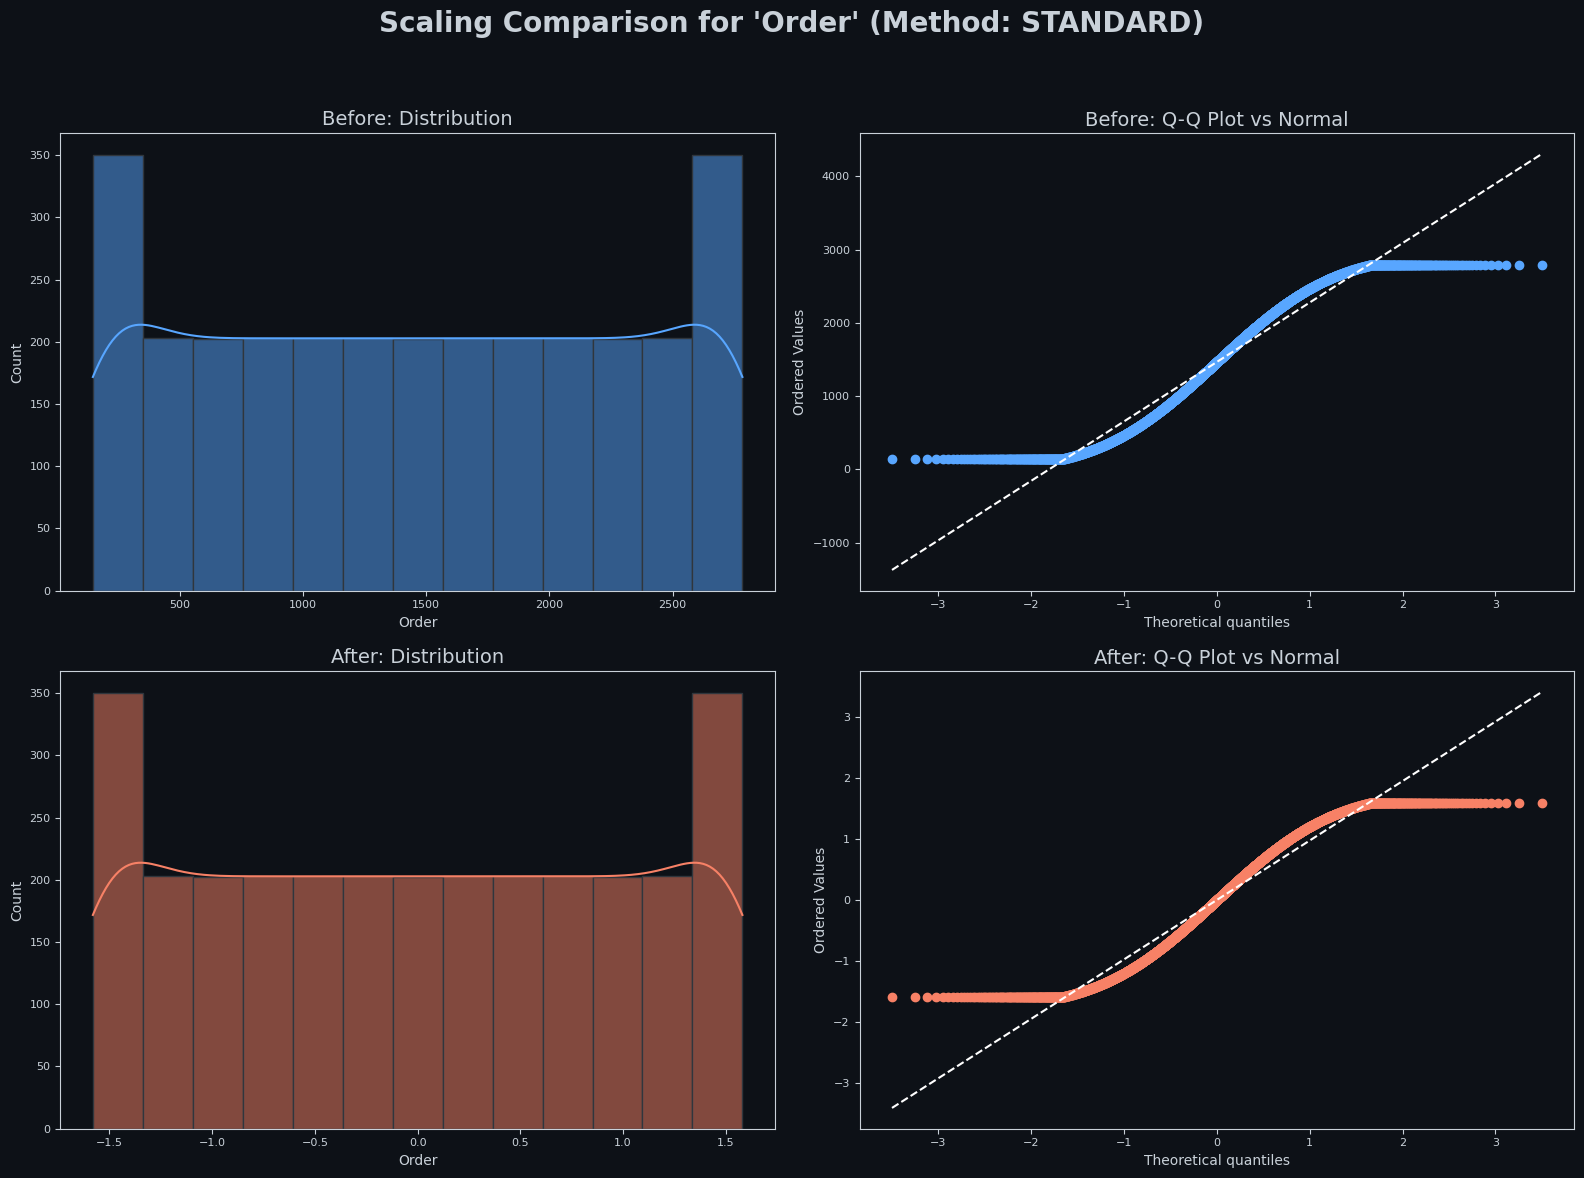

[('Neighborhood', {'unique_count': 28, 'missing_ratio': 0.0, 'correlation_with_target': 0.5260240175390306, 'ohe_memory_mb': 0.62591552734375, 'recommended_encoding': 'target', 'sample_values': {'NAmes': 443, 'CollgCr': 267, 'OldTown': 239}}), ('Garage Finish', {'unique_count': 3, 'missing_ratio': 0.0, 'correlation_with_target': 0.4406203594165858, 'ohe_memory_mb': 0.0670623779296875, 'recommended_encoding': 'ordinal_suggest', 'sample_values': {'Unf': 1390, 'RFn': 812, 'Fin': 728}}), ('Bsmt Qual', {'unique_count': 5, 'missing_ratio': 0.0, 'correlation_with_target': 0.42586333274737054, 'ohe_memory_mb': 0.1117706298828125, 'recommended_encoding': 'ordinal_suggest', 'sample_values': {'TA': 1363, 'Gd': 1219, 'Ex': 258}}), ('Exter Qual', {'unique_count': 4, 'missing_ratio': 0.0, 'correlation_with_target': 0.4102574310524565, 'ohe_memory_mb': 0.08941650390625, 'recommended_encoding': 'ordinal_suggest', 'sample_values': {'TA': 1799, 'Gd': 989, 'Ex': 107}}), ('Kitchen Qual', {'unique_count': 

Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal

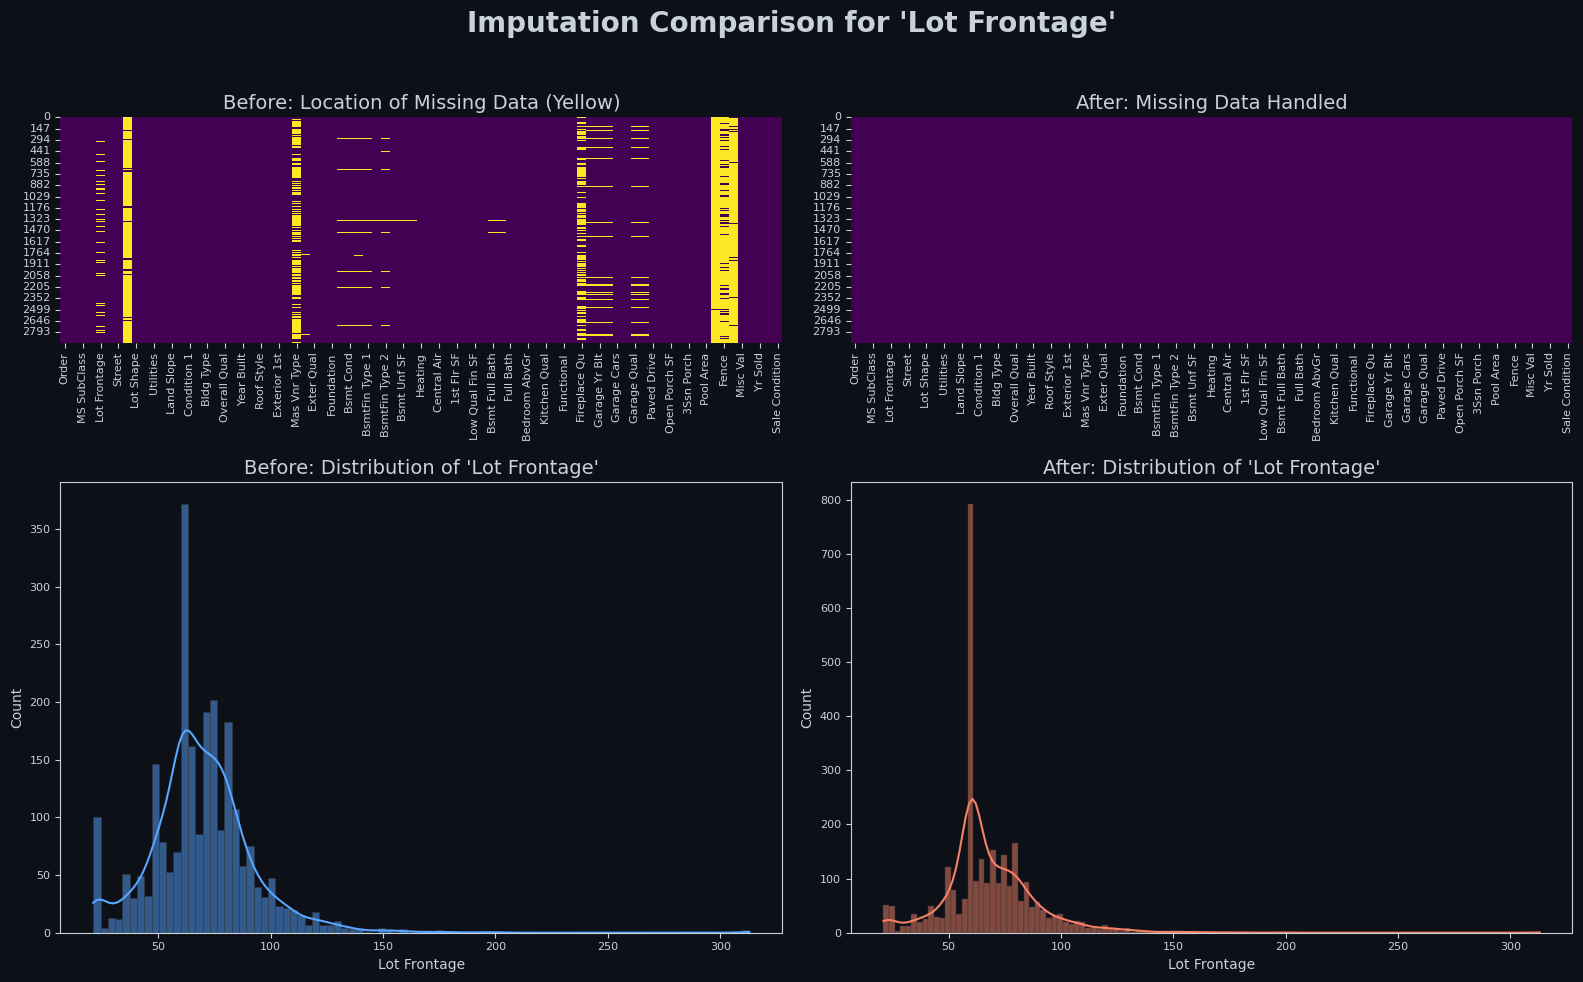
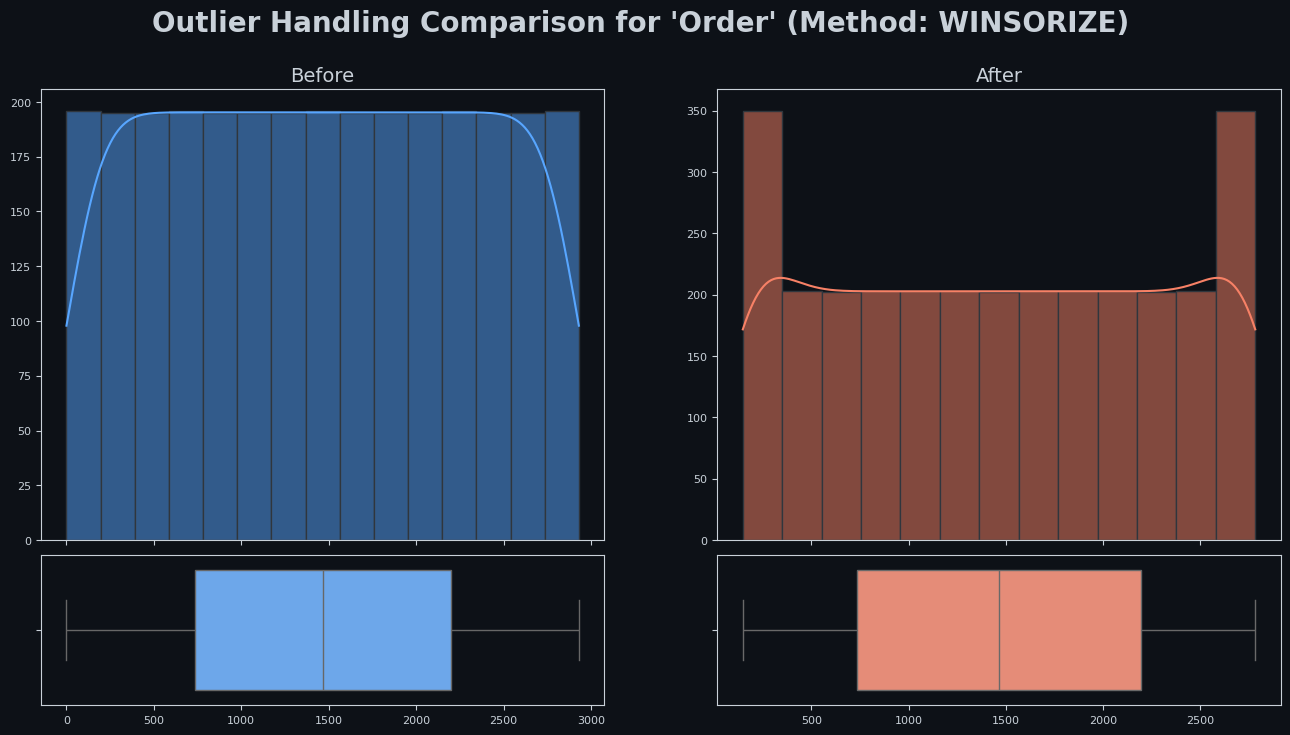
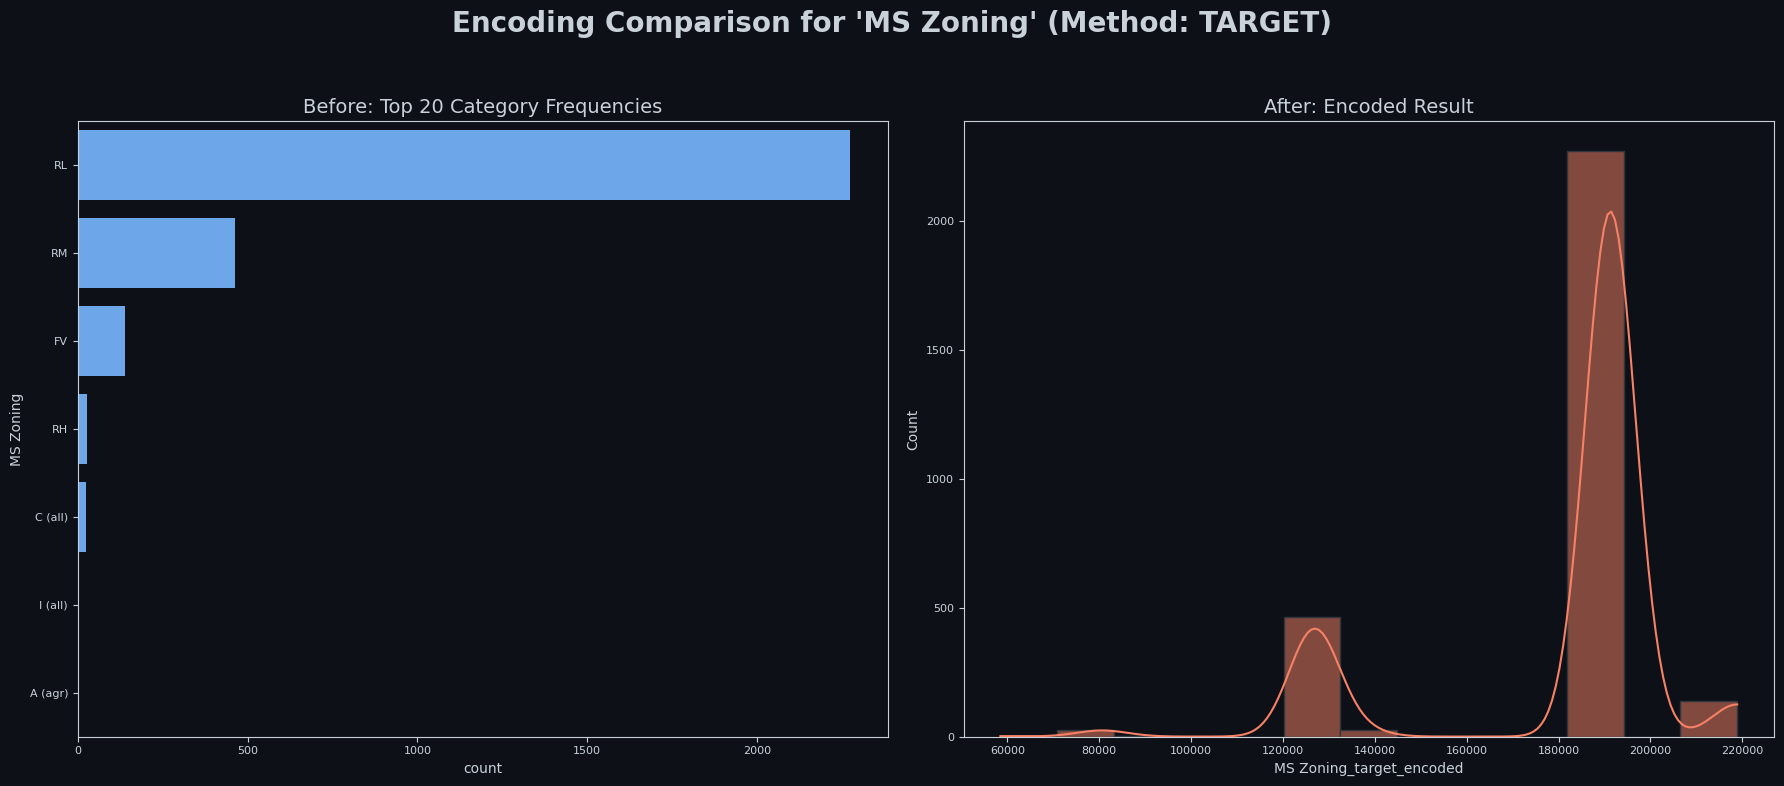

In [5]:
import pandas as pd
from noventis.data_cleaner import NoventisDataCleaner
import seaborn as sns

# Assume X and y are pre-loaded DataFrames/Series
df = df = pd.read_csv('../dataset_for_examples/AmesHousing.csv')
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

# 1. Define custom configurations for each step
imputer_config = {'method': 'auto'}
outlier_config = {'default_method': 'winsorize'}
encoder_config = {'method': 'auto', 'target_column': 'SalePrice'}
scaler_config = {'method': 'auto'}

# 2. Initialize the cleaner with the custom configurations
cleaner = NoventisDataCleaner(
    pipeline_steps=['impute', 'outlier', 'encode', 'scale'],
    imputer_params=imputer_config,
    outlier_params=outlier_config,
    encoder_params=encoder_config,
    scaler_params=scaler_config,
    verbose=True,
)

# 3. Run the entire pipeline
cleaned_df = cleaner.fit_transform(X, y)

# 4. Generate the interactive HTML report
cleaner.generate_html_report()


In [6]:
# --- USE CASE 2: FORCE STANDARD SCALER ---
print("\n" * 3 + "="*20 + " USE CASE 2: FORCE STANDARD SCALER " + "="*20)
standard_scaler = NoventisScaler(method='standard')
df_standard_scaled = standard_scaler.fit_transform(df_original.copy())
print("\nHasil setelah STANDARD scaling (5 baris pertama):")
print(df_standard_scaled.head())
plot_scaling_comparison(df_original, df_standard_scaled, "FORCE STANDARD")






==================== USE CASE 2: FORCE STANDARD SCALER ====================


NameError: name 'df_original' is not defined




==================== USE CASE 3: FORCE ROBUST SCALER ====================

Hasil setelah ROBUST scaling (5 baris pertama):
   normal_data  skewed_data  data_with_outliers  bimodal_data
0     0.361918     0.111078           -0.172000     -0.367644
1    -0.112978     0.042280            0.063541     -0.345952
2     0.474830    -0.056689            0.858951     -0.473676
3     1.129492     3.425201           -0.659709     -0.539265
4    -0.184692     0.070952            0.230129     -0.437938


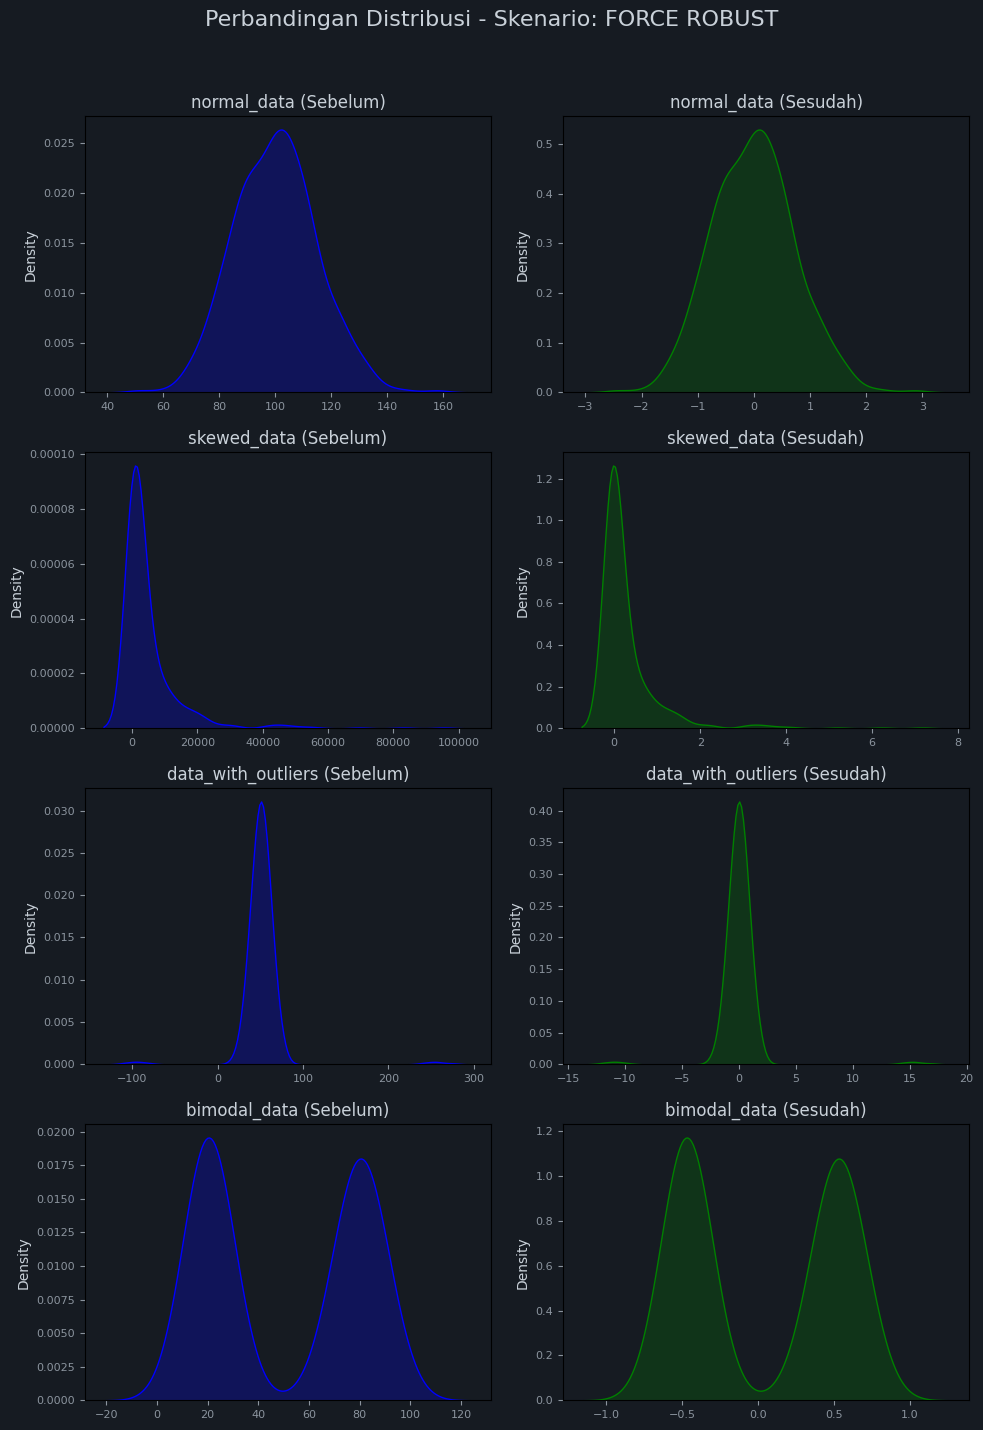

In [ ]:

# --- USE CASE 3: FORCE ROBUST SCALER ---
print("\n" * 3 + "="*20 + " USE CASE 3: FORCE ROBUST SCALER " + "="*20)
robust_scaler = NoventisScaler(method='robust')
df_robust_scaled = robust_scaler.fit_transform(df_original.copy())
print("\nHasil setelah ROBUST scaling (5 baris pertama):")
print(df_robust_scaled.head())
plot_scaling_comparison(df_original, df_robust_scaled, "FORCE ROBUST")







=================== USE CASE 4: FORCE POWER TRANSFORMER =================

Hasil setelah POWER scaling (5 baris pertama):
   normal_data  skewed_data  data_with_outliers  bimodal_data
0     0.518668     0.405491           -0.129868     -0.634886
1    -0.122357     0.205696           -0.010658     -0.575292
2     0.668089    -0.369218            0.394961     -0.960944
3     1.513983     2.097517           -0.375221     -1.201754
4    -0.221031     0.297861            0.073916     -0.843711


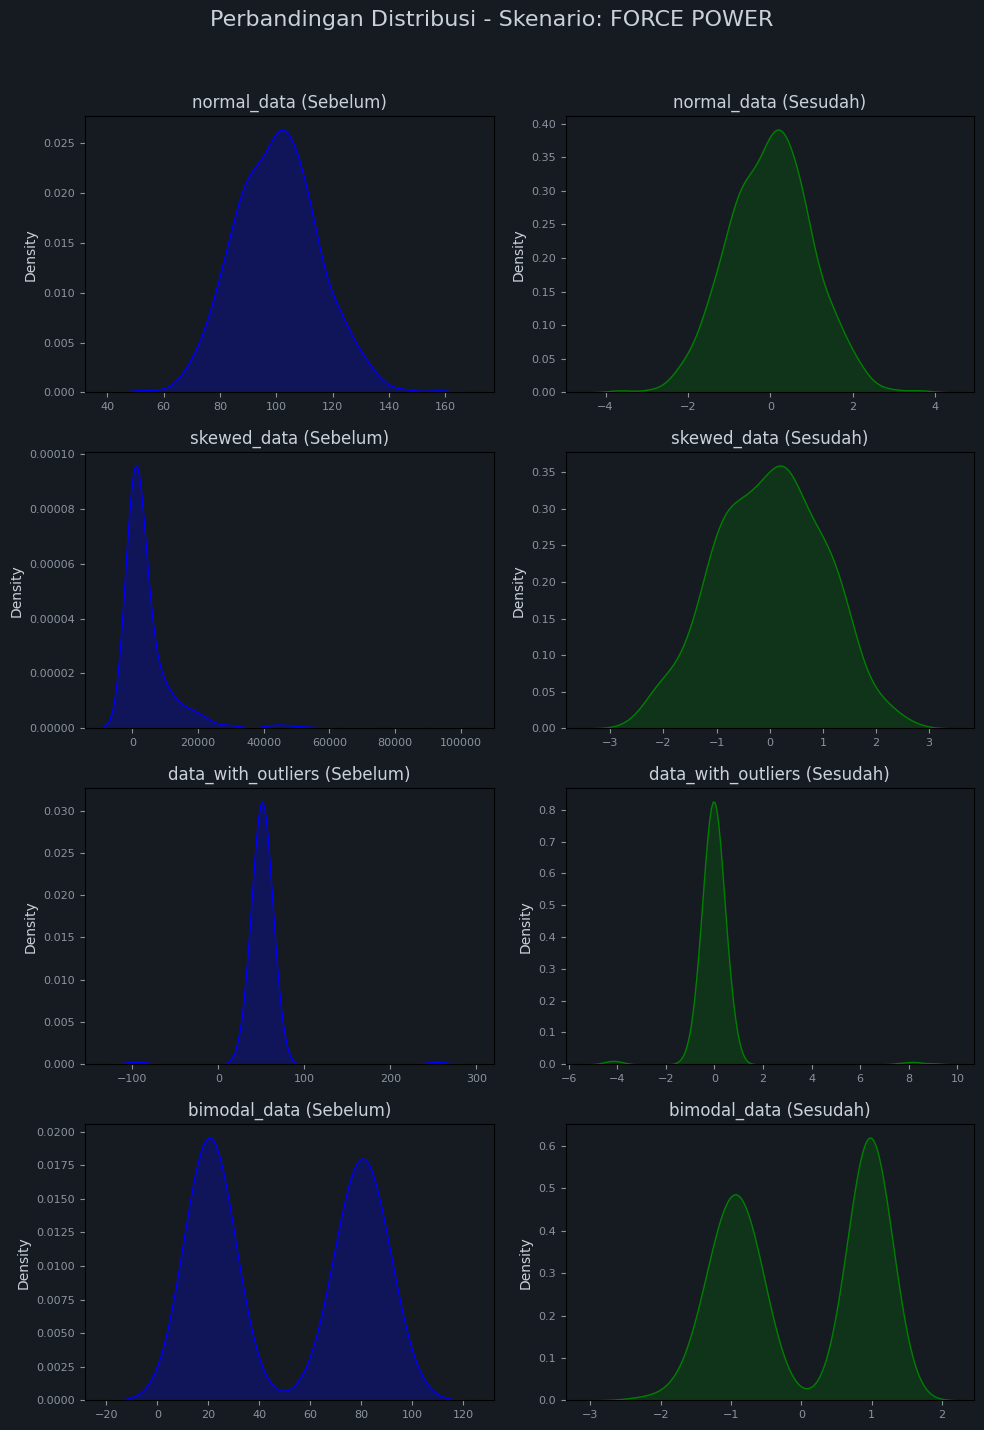

In [ ]:
# --- USE CASE 4: FORCE POWER TRANSFORMER ---
print("\n" * 3 + "="*19 + " USE CASE 4: FORCE POWER TRANSFORMER " + "="*17)
power_scaler = NoventisScaler(method='power')
df_power_scaled = power_scaler.fit_transform(df_original.copy())
print("\nHasil setelah POWER scaling (5 baris pertama):")
print(df_power_scaled.head())
plot_scaling_comparison(df_original, df_power_scaled, "FORCE POWER")

In [ ]:
df = sb.load_dataset('titanic')

NameError: name 'sb' is not defined

In [ ]:
df.head(5)

In [ ]:
scaler = NoventisScaler()
scaler.fit(df[['fare']])

In [ ]:
df.info()

In [ ]:
encoder = NoventisEncoder()
encoded_df = encoder.fit(df, y='alone')

In [ ]:
encoded_df